## CMA-ES

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

from cmaes import CMA

As in other cases, we will employ the Ackley function in our examples

In [2]:
def ackley(x, y):
    return -20 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2))) - np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))) + np.e + 20

In [3]:
def plot_ackley(pop):
    ax = plt.figure(figsize=(20,10)).add_subplot(projection='3d')
    xvals = np.linspace(-5, 5, 201)
    yvals = np.linspace(-5, 5, 201)
    xx, yy = np.meshgrid(xvals, yvals)
    z = ackley(xx, yy)
    ax.plot_surface(xx, yy, z, antialiased=True, alpha=0.2)
    x_pop = [p[0] for p in pop]
    y_pop = [p[1] for p in pop]
    z_pop = [ackley(p[0], p[1]) for p in pop]
    ax.scatter(x_pop, y_pop, z_pop, c="red")
    return ax

The ```cmaes``` library allows to use CMA-ES directly. Each time we can ask the optimizer for a new collection of points via the method ```ask``` and then we can return them to the optimizer paired with their fitness value via the method ```tell```.

In [4]:

def run_CMA(fit, sigma):
    optimizer = CMA(mean=[4,4], sigma=sigma)
    all_solutions = []
    for generation in range(50):
            solutions = []
            for _ in range(optimizer.population_size):
                x = optimizer.ask()
                value = fit(x[0], x[1])
                solutions.append((x, value))
            optimizer.tell(solutions)
            all_solutions.append(solutions)
    return all_solutions

In [5]:
def plot_gen(solutions, gen):
    s = [x[0] for x in solutions[gen]]
    plot_ackley(s)

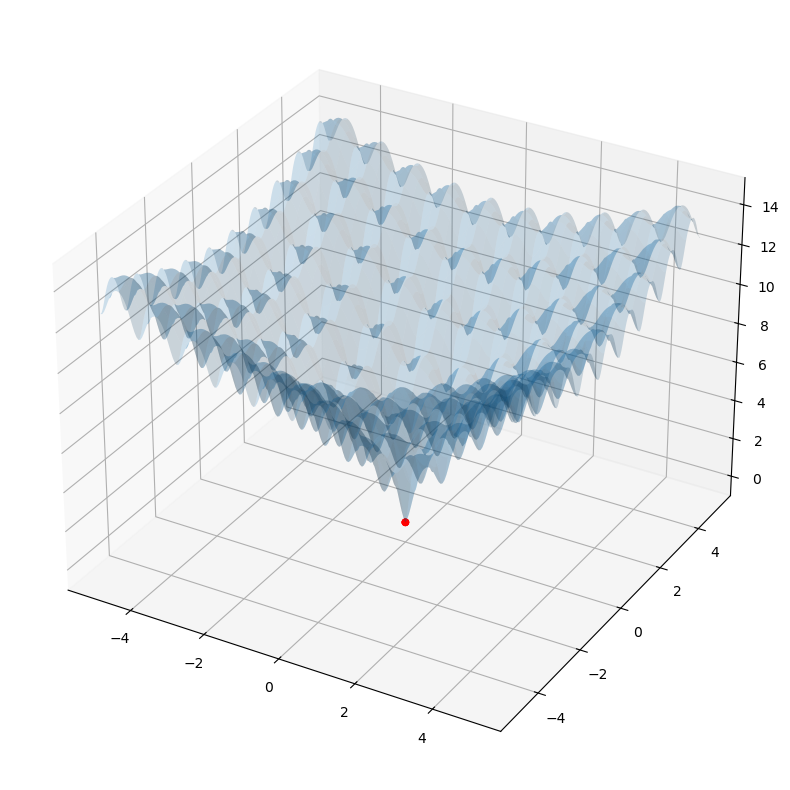

In [6]:
sol = run_CMA(ackley, 1.1)
plot_gen(sol, 49)
